<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [16]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [32]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [35]:
boston_df=pd.read_csv(boston_url)

In [21]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


##### For the "Median value of owner-occupied homes" provide a boxplot

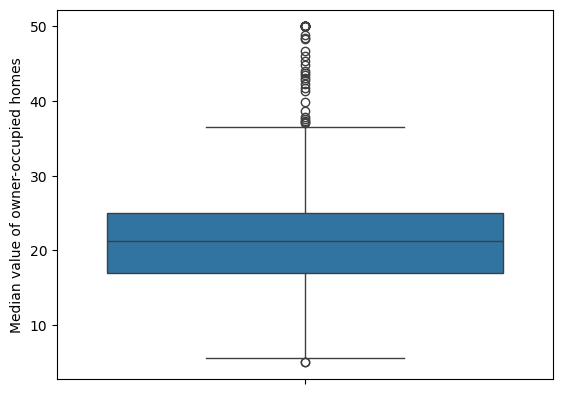

In [18]:
sns.boxplot(y='MEDV', data=boston_df)
plt.ylabel('Median value of owner-occupied homes')
plt.show()

##### A bar plot for the Charles river variable

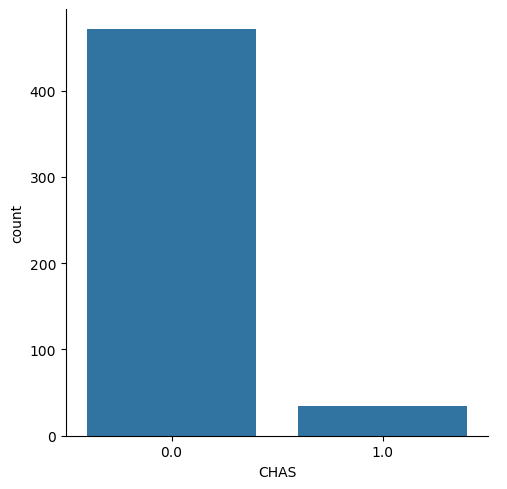

In [26]:
sns.catplot(x='CHAS', kind='count',data=boston_df)
plt.show()

##### A boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [36]:
#categorize age groups
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<=70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>70), 'AGE_GROUP'] = '70 years and older'

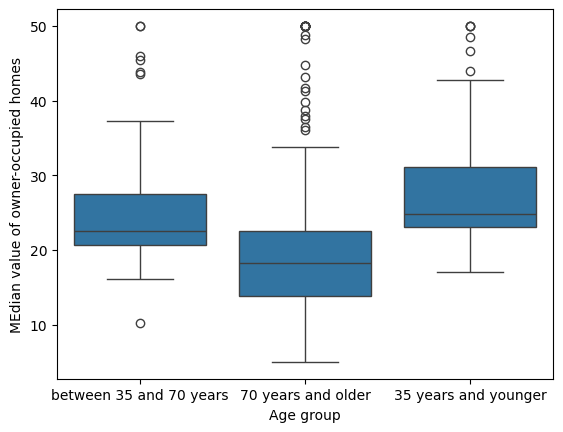

In [38]:
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.xlabel('Age group')
plt.ylabel('MEdian value of owner-occupied homes')
plt.show()

##### A scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

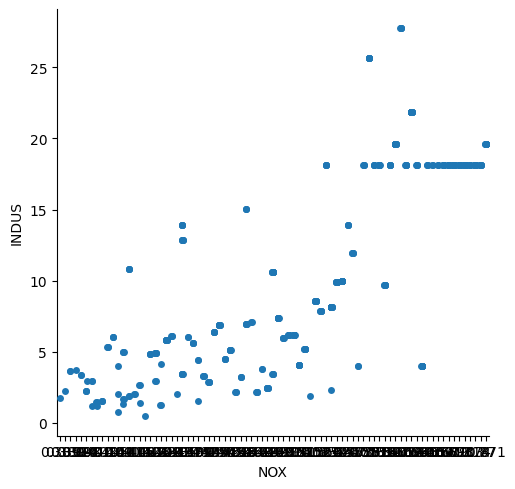

In [43]:
sns.catplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

###### Based on the scatter plot, there is a positive relationship between Nitric Oxide Concentration and the proportion of non-retail business acres per town.

##### A histogram for the pupil to teacher ratio variable

<ipython-input-48-8702532d86e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO'], kde=False)


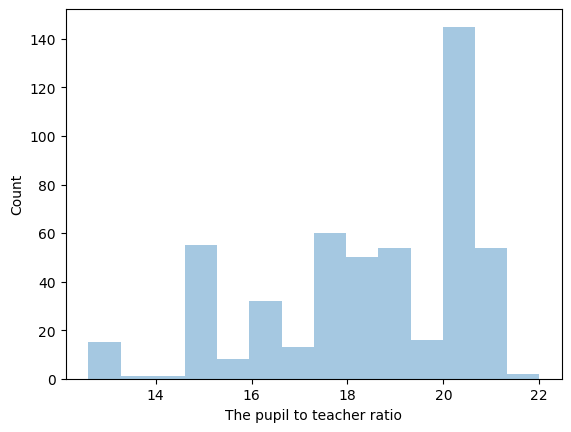

In [48]:
sns.distplot(boston_df['PTRATIO'], kde=False)
plt.xlabel('The pupil to teacher ratio')
plt.ylabel('Count')
plt.show()

##### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

###### Hypothesis (H0): There is no significant differences in median value of houses bounded by the Charles river or not.
###### Independent variable: Whether the house is bounded by the Charles river
###### Dependent variable: The median value of houses

In [49]:
# Variance homogeneous test
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [50]:
# The revene's test shows the vairance is not equal to each other.
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)


TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

###### Based on the t-test, we reject the null hypothesis. Therefore, there is a significant difference between the median house prices between one bounded by the Charles river and those not bounded. 

##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [52]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [53]:
# The revene's test failed to reject the null - we assume the euqal variance.
group1 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(group1, group2, group3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


###### The ANOVA test failed to reject the null - there is no significant difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

##### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [55]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

###### Based on the Pearson correlation, there is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

##### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [56]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        18:07:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### We can conclude that 